In [1]:
# 필요한 패키지 설치 및 로드
install.packages("devtools")
devtools::install_github("twitter/AnomalyDetection")
library(AnomalyDetection)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’





rlang   (1.1.3 -> 1.1.4) [CRAN]
munsell (0.5.0 -> 0.5.1) [CRAN]
farver  (2.1.1 -> 2.1.2) [CRAN]
stringi (1.8.3 -> 1.8.4) [CRAN]
isoband (0.2.6 -> 0.2.7) [CRAN]
gtable  (0.3.4 -> 0.3.5) [CRAN]
ggplot2 (3.4.4 -> 3.5.1) [CRAN]


Installing 7 packages: rlang, munsell, farver, stringi, isoband, gtable, ggplot2

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpSZHp2r/remotes62b367fed39/twitter-AnomalyDetection-1f5deaa/DESCRIPTION’ ... OK
* preparing ‘AnomalyDetection’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘AnomalyDetection_1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# 데이터 불러오기
data <- read.csv("lithium_prices.csv")

# 날짜 형식으로 변환
data$date <- as.POSIXct(data$date)

$anoms
    timestamp anoms
1  2022-09-07 482.5
2  2022-09-08 482.5
3  2022-09-09 482.5
4  2022-09-13 482.5
5  2022-09-14 482.5
6  2022-09-16 485.5
7  2022-09-19 485.5
8  2022-09-20 486.5
9  2022-09-21 486.5
10 2022-09-22 486.5
11 2022-09-23 486.5
12 2022-09-26 489.5
13 2022-09-27 494.5
14 2022-09-28 494.5
15 2022-09-29 494.5
16 2022-10-10 501.5
17 2022-10-11 507.5
18 2022-10-12 509.5
19 2022-10-13 514.5
20 2022-10-14 524.5
21 2022-10-17 525.5
22 2022-10-18 525.5
23 2022-10-19 525.5
24 2022-10-20 525.5
25 2022-10-21 540.5
26 2022-10-24 540.5
27 2022-10-25 540.5
28 2022-10-26 547.5
29 2022-10-27 547.5
30 2022-10-28 549.5
31 2022-10-31 550.5
32 2022-11-01 557.5
33 2022-11-02 557.5
34 2022-11-03 562.5
35 2022-11-04 572.5
36 2022-11-07 574.5
37 2022-11-08 577.5
38 2022-11-09 577.5
39 2022-11-10 577.5
40 2022-11-11 581.5
41 2022-11-14 581.5
42 2022-11-15 578.5
43 2022-11-16 576.5
44 2022-11-17 576.5
45 2022-11-18 576.5
46 2022-11-21 576.5
47 2022-11-22 576.5
48 2022-11-23 575.5
49 2022-11-24

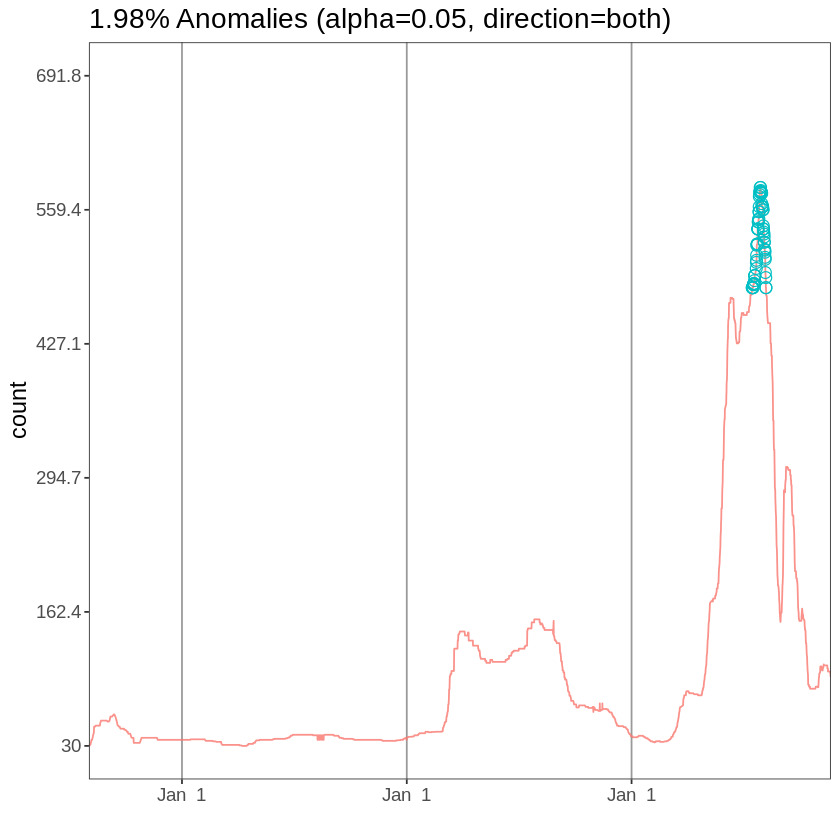

In [3]:
# 이상치 탐지 수행
result <- AnomalyDetectionTs(data, max_anoms=0.02, direction='both', plot=TRUE)

# 결과 출력
print(result)

AnomalyDetection 패키지는 트위터에서 개발한 시계열 데이터의 이상치 탐지에 특화된 도구로, 이상치를 효과적으로 탐지할 수 있는 강력한 알고리즘을 제공합니다. 이 패키지는 특히 트위터 데이터 분석에 사용되는 실시간 이상치 탐지 시스템에서 비롯되었습니다.

##모델의 유형과 정확성
###모델 유형

#####분해(decomposition) 기반 모델: AnomalyDetection 패키지는 시계열 데이터를 트렌드(trend), 계절성(seasonality), 잔차(residual)로 분해하여 이상치를 탐지합니다. 이 접근 방식은 시계열 데이터의 패턴을 이해하고, 일반적인 패턴에서 벗어나는 부분을 이상치로 식별하는 데 유용합니다.
#####이상치 탐지 방법: 이 패키지는 각 시계열 요소(트렌드, 계절성, 잔차)를 개별적으로 분석하여 이상치를 탐지합니다. 이는 데이터의 전반적인 구조와 패턴을 고려하여 이상치를 보다 정확하게 식별할 수 있게 합니다.

###정확성

#####정밀도(Precision): 탐지된 이상치 중 실제 이상치의 비율을 의미합니다. AnomalyDetection 패키지는 일반적으로 높은 정밀도를 유지하며, 이는 잘못된 이상치 탐지(즉, false positive)를 최소화하는 데 도움이 됩니다.
#####재현율(Recall): 실제 이상치 중 탐지된 이상치의 비율을 의미합니다. 이 패키지는 적절한 재현율을 유지하여 가능한 많은 실제 이상치를 탐지하려고 합니다.
#####조정 가능성: max_anoms 파라미터를 통해 허용 가능한 이상치 비율을 조정할 수 있습니다. 이를 통해 탐지 민감도를 조정하여 정확성을 높일 수 있습니다.


##장점 및 한계
###장점

#####자동화된 탐지: 데이터의 트렌드와 계절성을 자동으로 학습하고, 이를 기반으로 이상치를 탐지합니다.
#####사용 용이성: 사용하기 쉬운 함수 인터페이스와 시각화 기능을 제공하여, 복잡한 설정 없이도 이상치를 탐지하고 결과를 쉽게 해석할 수 있습니다.
#####실시간 적용 가능성: 실시간 데이터 스트림에서도 적용 가능하여, 실시간 이상치 탐지 시스템에 유용합니다.

###한계

#####복잡한 패턴: 매우 복잡하거나 비정형적인 시계열 데이터에서는 성능이 저하될 수 있습니다.
#####큰 데이터셋: 매우 큰 데이터셋에서는 계산 비용이 증가할 수 있으며, 이 경우 성능 최적화가 필요할 수 있습니다.
#####모델 한계: 특정 유형의 이상치(예: 갑작스러운 변화, 점진적 변화 등)에 대해 다른 이상치 탐지 방법들보다 덜 민감할 수 있습니다.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'AnomalyDetection' from a github remote, the SHA1 (1f5deaa1) has not changed since last install.
  Use `force = TRUE` to force installation



$anoms
    timestamp anoms
1  2022-09-07 482.5
2  2022-09-08 482.5
3  2022-09-09 482.5
4  2022-09-13 482.5
5  2022-09-14 482.5
6  2022-09-16 485.5
7  2022-09-19 485.5
8  2022-09-20 486.5
9  2022-09-21 486.5
10 2022-09-22 486.5
11 2022-09-23 486.5
12 2022-09-26 489.5
13 2022-09-27 494.5
14 2022-09-28 494.5
15 2022-09-29 494.5
16 2022-10-10 501.5
17 2022-10-11 507.5
18 2022-10-12 509.5
19 2022-10-13 514.5
20 2022-10-14 524.5
21 2022-10-17 525.5
22 2022-10-18 525.5
23 2022-10-19 525.5
24 2022-10-20 525.5
25 2022-10-21 540.5
26 2022-10-24 540.5
27 2022-10-25 540.5
28 2022-10-26 547.5
29 2022-10-27 547.5
30 2022-10-28 549.5
31 2022-10-31 550.5
32 2022-11-01 557.5
33 2022-11-02 557.5
34 2022-11-03 562.5
35 2022-11-04 572.5
36 2022-11-07 574.5
37 2022-11-08 577.5
38 2022-11-09 577.5
39 2022-11-10 577.5
40 2022-11-11 581.5
41 2022-11-14 581.5
42 2022-11-15 578.5
43 2022-11-16 576.5
44 2022-11-17 576.5
45 2022-11-18 576.5
46 2022-11-21 576.5
47 2022-11-22 576.5
48 2022-11-23 575.5
49 2022-11-24

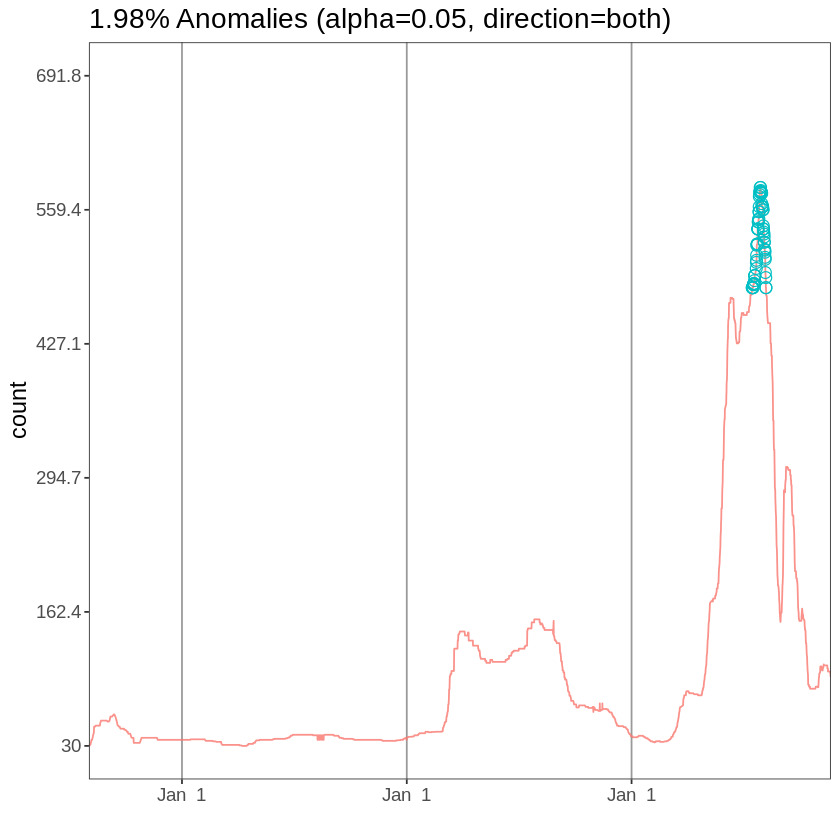

In [4]:
# 필요한 패키지 설치 및 로드
install.packages("devtools")
devtools::install_github("twitter/AnomalyDetection")
library(AnomalyDetection)

# 데이터 불러오기
data <- read.csv("lithium_prices.csv")

# 날짜 형식으로 변환
data$date <- as.POSIXct(data$date)

# 이상치 탐지 수행
result <- AnomalyDetectionTs(data, max_anoms=0.02, direction='both', plot=TRUE)

# 결과 출력
print(result)

##이상치 탐지 모델의 유형

###1. 통계적 방법 (Statistical Methods):

#####IQR (Interquartile Range): 데이터의 1사분위수(Q1)와 3사분위수(Q3) 사이의 범위를 이용하여 이상치를 탐지합니다.
#####Z-Score: 데이터의 평균과 표준편차를 이용하여 각 데이터 포인트가 평균으로부터 몇 표준편차 떨어져 있는지를 계산하여 이상치를 탐지합니다.

###2. 머신러닝 방법 (Machine Learning Methods):

#####Isolation Forest: 데이터 포인트를 랜덤하게 분리하여 이상치를 탐지하는 모델입니다.
#####One-Class SVM: 정상 데이터만을 사용하여 학습한 후, 새로운 데이터가 정상인지 이상치인지를 분류합니다.

###3.딥러닝 방법 (Deep Learning Methods):

#####Autoencoders: 입력 데이터를 압축하고 다시 복원하여 재구성 오류를 기반으로 이상치를 탐지합니다.

##R에서 사용되는 주요 이상치 탐지 패키지

###1. outliers 패키지:

#####Grubbs 테스트, Dixon 테스트, Rosner 테스트 등 다양한 통계적 방법을 제공합니다.

###2. forecast 패키지:

#####시계열 데이터에서 이상치를 탐지하는 데 사용됩니다. 예를 들어, tsoutliers() 함수는 시계열 데이터에서 자동으로 이상치를 탐지합니다.

###3. anomalize 패키지:

#####tidyverse와 통합되어 있으며, 시계열 데이터에서 이상치를 탐지하고 시각화하는 데 사용됩니다.

###4. isolationForest 패키지:

#####Isolation Forest 알고리즘을 구현한 패키지로, 대규모 데이터셋에서도 효율적으로 이상치를 탐지할 수 있습니다.

##모델의 정확성 평가
이상치 탐지 모델의 정확성은 다양한 지표를 통해 평가될 수 있습니다. 대표적인 지표로는 다음과 같은 것들이 있습니다:

###1. Precision (정밀도): 모델이 탐지한 이상치 중 실제 이상치의 비율입니다.
###2. Recall (재현율): 실제 이상치 중 모델이 올바르게 탐지한 비율입니다.
###3. F1-Score: Precision과 Recall의 조화 평균으로, 두 지표의 균형을 평가합니다.
###4. ROC-AUC (Receiver Operating Characteristic - Area Under Curve): 모델의 분류 성능을 평가하는 지표로, 1에 가까울수록 성능이 우수함을 의미합니다.